<a href="https://colab.research.google.com/github/adithi1412/Unified-Mentor-Internship/blob/main/Data%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

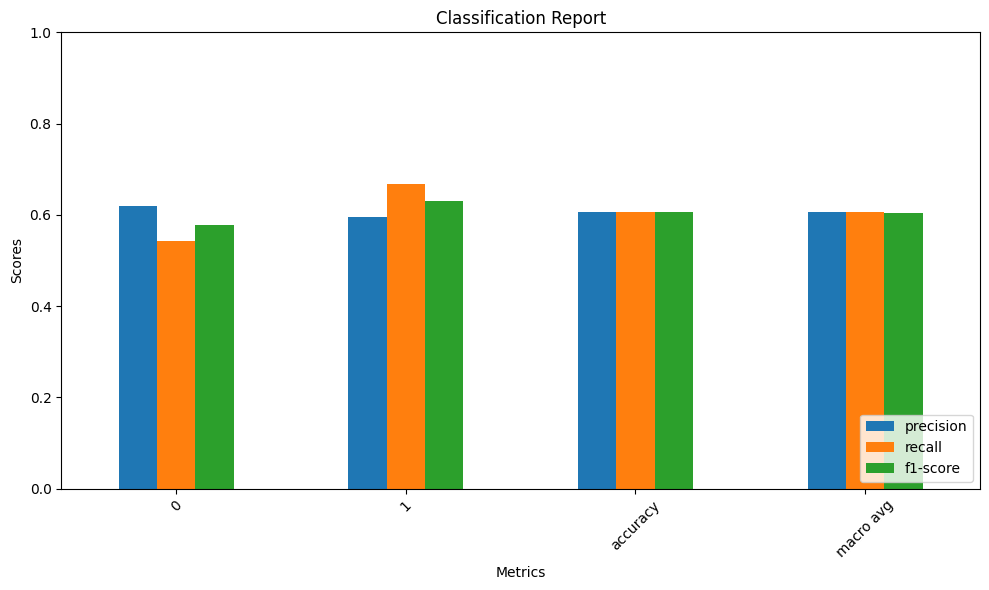

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/greendestination (1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select relevant features and the target variable
features = ['Age', 'YearsAtCompany', 'MonthlyIncome']
target = 'Attrition'

# Convert 'Attrition' to binary
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Split the data into features and target variable
X = data[features]
y = data[target]

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model on the resampled data
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the resampled test set
y_pred_resampled = log_reg_resampled.predict(X_test_resampled)

# Generate a classification report for the resampled data
report_resampled = classification_report(y_test_resampled, y_pred_resampled, output_dict=True)
report_resampled_df = pd.DataFrame(report_resampled).transpose()

# Plot the classification report
fig, ax = plt.subplots(figsize=(10, 6))
report_resampled_df.iloc[:-1, :3].plot(kind='bar', ax=ax)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
